In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

from keras.applications.vgg16 import VGG16 
from keras.models import Model

# Create dataframe

In [2]:
ushapes = r"G:/My Drive/HARP_DATASET/dataset_supervised/square_images_size224/UShape"
no_ushapes = r"G:/My Drive/HARP_DATASET/dataset_supervised/square_images_size224/NoUshape"

In [3]:
def extract_spectrograms(path):
  os.chdir(path)
  spectrograms = []

  with os.scandir(path) as files:
    for file in files:
      if file.name.endswith('.png'):
        spectrograms.append(file.name)
  return spectrograms

ushapes_spectrograms = extract_spectrograms(ushapes)
all_spectrograms = extract_spectrograms(no_ushapes)

print(len(ushapes_spectrograms), len(all_spectrograms))
no_ushape_spectrograms = [spectrogram_without_ushape for spectrogram_without_ushape in all_spectrograms if spectrogram_without_ushape not in ushapes_spectrograms]

168 3946


In [7]:
def extract_some_spectrograms(spectrograms, begin, count):
  return spectrograms[begin:count]

training_ushape = extract_some_spectrograms(ushapes_spectrograms, 1, 118)
training_no_ushape = extract_some_spectrograms(no_ushape_spectrograms, 1,118)

validation_ushape = extract_some_spectrograms(ushapes_spectrograms, 119, 144)
validation_no_ushape = extract_some_spectrograms(no_ushape_spectrograms, 119,144)

evaluation_ushape = extract_some_spectrograms(ushapes_spectrograms, 145, 168)
evaluation_no_ushape = extract_some_spectrograms(no_ushape_spectrograms, 145,168)

In [8]:
def fill_df_with_label(spectrograms, label):
  new_df =  pd.DataFrame()
  new_df['filename'] = spectrograms
  new_df['label'] = [label] * len(spectrograms)

  return new_df


df_train = fill_df_with_label(training_ushape, "ushape").append(fill_df_with_label(training_no_ushape, "noshape"))

df_val = fill_df_with_label(validation_ushape, "ushape").append(fill_df_with_label(validation_no_ushape, "noshape"))

df_test = fill_df_with_label(evaluation_ushape, "ushape").append(fill_df_with_label(evaluation_no_ushape, "noshape"))


C:\Users\student\AppData\Local\Temp\ipykernel_1252\3455838255.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = fill_df_with_label(training_ushape, "ushape").append(fill_df_with_label(training_no_ushape, "noshape"))
C:\Users\student\AppData\Local\Temp\ipykernel_1252\3455838255.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_val = fill_df_with_label(validation_ushape, "ushape").append(fill_df_with_label(validation_no_ushape, "noshape"))
C:\Users\student\AppData\Local\Temp\ipykernel_1252\3455838255.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = fill_df_with_label(evaluation_ushape, "ushape").append(fill_df_with_label(evaluation_no_ushape, "noshape"))


In [9]:
print(df_val)

                                  filename    label
0   THE_stft_20081021_20081022_dynamic.png   ushape
1   THE_stft_20081004_20081005_dynamic.png   ushape
2   THE_stft_20081117_20081118_dynamic.png   ushape
3   THE_stft_20081111_20081112_dynamic.png   ushape
4   THE_stft_20081006_20081007_dynamic.png   ushape
5   THE_stft_20150209_20150210_dynamic.png   ushape
6   THE_stft_20150520_20150521_dynamic.png   ushape
7   THE_stft_20150521_20150522_dynamic.png   ushape
8   THE_stft_20150522_20150523_dynamic.png   ushape
9   THE_stft_20150618_20150619_dynamic.png   ushape
10  THE_stft_20150619_20150620_dynamic.png   ushape
11  THE_stft_20150626_20150627_dynamic.png   ushape
12  THE_stft_20150702_20150703_dynamic.png   ushape
13  THE_stft_20150709_20150710_dynamic.png   ushape
14  THE_stft_20150716_20150717_dynamic.png   ushape
15  THE_stft_20150718_20150719_dynamic.png   ushape
16  THE_stft_20150821_20150822_dynamic.png   ushape
17  THE_stft_20150830_20150831_dynamic.png   ushape
18  THE_stft

In [10]:
# Initialize the Pretrained Model
feature_extractor = VGG16(include_top=False)

# Set this parameter to make sure it's not being trained
feature_extractor.trainable = False

# Set the input layer
input_ = tf.keras.Input(shape=(224, 224, 3))

# Set the feature extractor layer
x = feature_extractor(input_, training=False)

# Set the pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Set the final layer with sigmoid activation function
output_ = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create the new model object
model = tf.keras.Model(input_, output_)

# Compile it
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Print The Summary of The Model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
print(df_val)

                                  filename    label
0   THE_stft_20081021_20081022_dynamic.png   ushape
1   THE_stft_20081004_20081005_dynamic.png   ushape
2   THE_stft_20081117_20081118_dynamic.png   ushape
3   THE_stft_20081111_20081112_dynamic.png   ushape
4   THE_stft_20081006_20081007_dynamic.png   ushape
5   THE_stft_20150209_20150210_dynamic.png   ushape
6   THE_stft_20150520_20150521_dynamic.png   ushape
7   THE_stft_20150521_20150522_dynamic.png   ushape
8   THE_stft_20150522_20150523_dynamic.png   ushape
9   THE_stft_20150618_20150619_dynamic.png   ushape
10  THE_stft_20150619_20150620_dynamic.png   ushape
11  THE_stft_20150626_20150627_dynamic.png   ushape
12  THE_stft_20150702_20150703_dynamic.png   ushape
13  THE_stft_20150709_20150710_dynamic.png   ushape
14  THE_stft_20150716_20150717_dynamic.png   ushape
15  THE_stft_20150718_20150719_dynamic.png   ushape
16  THE_stft_20150821_20150822_dynamic.png   ushape
17  THE_stft_20150830_20150831_dynamic.png   ushape
18  THE_stft

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create the ImageDataGenerator object
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

val_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
) 

# Generate batches and augment the images
train_generator = train_datagen.flow_from_dataframe(
    df_train,
    # directory='harp/training/',
    x_col='filename',
    y_col='label',
    class_mode='binary',
    target_size=(224, 224),
)

val_generator = train_datagen.flow_from_dataframe(
    df_val,
    # directory='harp/validation/',
    x_col='filename',
    y_col='label',
    class_mode='binary',
    target_size=(224, 224),
)

Found 234 validated image filenames belonging to 2 classes.
Found 30 validated image filenames belonging to 2 classes.


c:\y\AppleCNN\venv\lib\site-packages\keras\preprocessing\image.py:989: UserWarning: Found 20 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn('Found {} invalid image filename(s) in x_col="{}". '


In [14]:
history = model.fit(train_generator, epochs=40, validation_data=val_generator)

Epoch 1/40
8/8 [==============================] - 62s 8s/step - loss: 1.3431 - accuracy: 0.4658 - val_loss: 2.8031 - val_accuracy: 0.2667
Epoch 2/40
8/8 [==============================] - 58s 7s/step - loss: 1.1080 - accuracy: 0.5812 - val_loss: 2.2513 - val_accuracy: 0.3333
Epoch 3/40
8/8 [==============================] - 58s 7s/step - loss: 0.7395 - accuracy: 0.6880 - val_loss: 1.0548 - val_accuracy: 0.6667
Epoch 4/40
8/8 [==============================] - 59s 7s/step - loss: 0.6713 - accuracy: 0.6923 - val_loss: 1.1769 - val_accuracy: 0.4667
Epoch 5/40
8/8 [==============================] - 58s 7s/step - loss: 0.5903 - accuracy: 0.7521 - val_loss: 1.0226 - val_accuracy: 0.5000
Epoch 6/40
8/8 [==============================] - 58s 7s/step - loss: 0.4850 - accuracy: 0.8120 - val_loss: 0.5317 - val_accuracy: 0.8000
Epoch 7/40
8/8 [==============================] - 58s 7s/step - loss: 0.4363 - accuracy: 0.8248 - val_loss: 0.3649 - val_accuracy: 0.9000
Epoch 8/40
8/8 [==================

In [15]:
model.save('C:\\y\\harp_transfer_vgg16')

INFO:tensorflow:Assets written to: C:\y\harp_transfer_vgg16\assets


INFO:tensorflow:Assets written to: C:\y\harp_transfer_vgg16\assets


In [16]:
import matplotlib.pyplot as plt

def predcit_image(file_to_test):
  img = tf.keras.utils.load_img(
          file_to_test, target_size=(224, 224)
      )
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)

  return predictions[0][0]


In [17]:
file_to_test = no_ushapes + "/THE_stft_20170524_20170525_dynamic.png"
predcit_image(file_to_test)

1/1 [==============================] - 0s 294ms/step


0.9872772

In [27]:
print(len(all_spectrograms))

dir_of_files_to_predict = "C:\y\dataset_manager\dataset_revolution\square_images_formatted_224"
result_data_frame = pd.DataFrame()
file_names = []
accuracies = []
with os.scandir(dir_of_files_to_predict) as files:
    for file in files:
        if file.name.endswith('.png'):
            result = predcit_image(file.path)
            file_names.append(file)
            accuracies.append(result)

result_data_frame['filename'] = file_names
result_data_frame['accuracy'] = accuracies

3946
1/1 [==============================] - 0s 184ms/step


In [19]:
result_data_frame['filename'] = [file.name for file in file_names]

In [20]:
from pathlib import Path  

filepath = Path('C:\y\AppleCNN\out.csv')  


result_data_frame.to_csv(filepath)  

PermissionError: [Errno 13] Permission denied: 'C:\\y\\AppleCNN\\out.csv'

In [ ]:
top_80 = result_data_frame.loc[result_data_frame['accuracy'] >= 0.80]
top_80.sort_values(by="accuracy")

print(len(top_80))

In [ ]:
import shutil
for image_name in top_80["filename"]:
    shutil.copyfile("C:\\y\\dataset_manager\\dataset_revolution\\square_images_formatted_224\\" + image_name, "C:\\y\\AppleCNN\\top80\\"+ image_name)

In [21]:
true_positive = 0
false_positive = 0
for image in top_80["filename"]:
    if image in ushapes_spectrograms:
        true_positive+= 1
    else:
        false_positive += 1

true_positive, false_positive

NameError: name 'top_80' is not defined

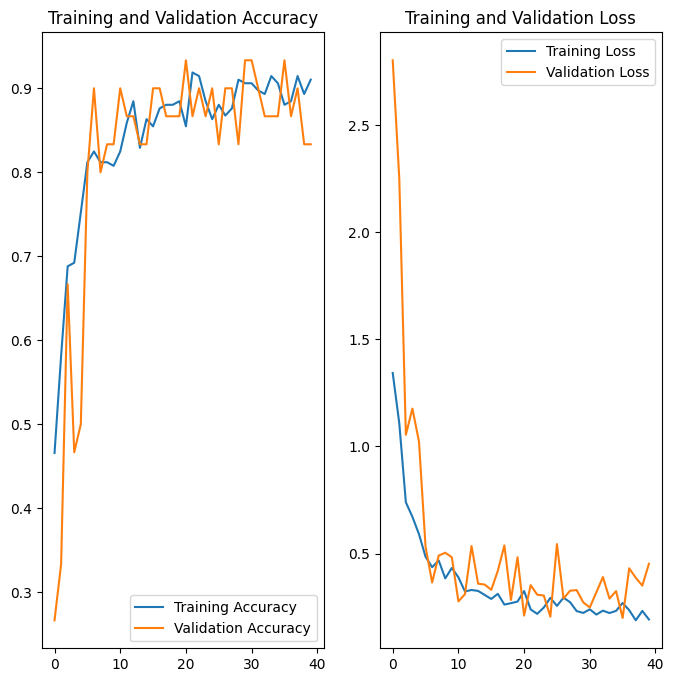

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(40)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
y_true = []
y_pred = []

for image in evaluation_ushape:
    result = predcit_image(ushapes + '/' + image)
    y_true.append(1)
    if result > 0.50:
        y_pred.append(1)
    else:
        y_pred.append(0)

for image in evaluation_no_ushape:
    result = predcit_image(no_ushapes + '/' + image)
    y_true.append(0)
    if result > 0.50:
        y_pred.append(1)
    else:
        y_pred.append(0)

1/1 [==============================] - 0s 144ms/step


In [26]:
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, y_pred))
print()
print(confusion_matrix(y_true, y_pred)) 

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        23
           1       1.00      0.78      0.88        23

    accuracy                           0.89        46
   macro avg       0.91      0.89      0.89        46
weighted avg       0.91      0.89      0.89        46


[[23  0]
 [ 5 18]]
